In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('Group_1_data_cleaned.pkl')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [5]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [6]:
df.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
2,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
3,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
4,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
5,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0


In [7]:
X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = forest.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12881
           1       0.99      0.99      0.99     55782

    accuracy                           0.98     68663
   macro avg       0.97      0.97      0.97     68663
weighted avg       0.98      0.98      0.98     68663



In [22]:
accuracy_score(y_test,y_pred)

0.9793484118083975

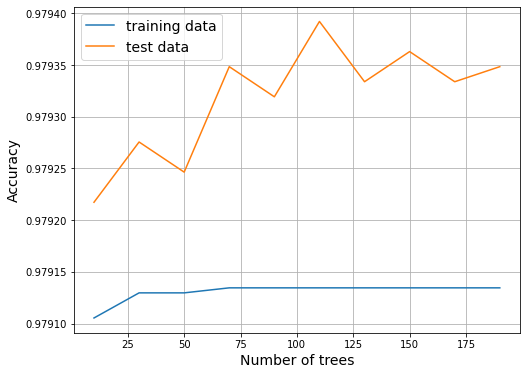

In [15]:
n_estimators = []
acc_train = []
acc_test = []

for i in range(10, 201, 20):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))
    
    n_estimators.append(i)
    
plt.figure(figsize=(8, 6))

plt.plot(n_estimators, acc_train, label="training data")
plt.plot(n_estimators, acc_test, label="test data")
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=14);
plt.grid();

In [25]:
rfc = RandomForestClassifier()

random_grid = {"n_estimators": range(10, 201, 20),
               "max_features": ["sqrt", "log2"],
               "max_depth": range(10, 101, 20)
              }

rfc_rs = GridSearchCV(rfc, 
                            param_grid = random_grid,
                            cv = 5, 
                            n_jobs = 10, 
                            scoring = "accuracy")

rfc_rs.fit(X_train, y_train)

print(rfc_rs.best_params_)

print(rfc_rs.best_score_)

{'max_depth': 70, 'max_features': 'sqrt', 'n_estimators': 30}
0.9785374834164147


In [26]:
forest = RandomForestClassifier(max_depth = 70, max_features = 'sqrt', n_estimators= 30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, n_estimators=30)

In [27]:
y_pred = forest.predict(X_test)
y_pred

print(classification_report(y_test, y_pred))

accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12881
           1       0.99      0.99      0.99     55782

    accuracy                           0.98     68663
   macro avg       0.97      0.97      0.97     68663
weighted avg       0.98      0.98      0.98     68663



0.9793921034618354